In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import cohen_kappa_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.experimental import enable_halving_search_cv
#from sklearn.model_selection import HalvingRandomSearchCV

from MolTaut import predict_tautomer


In [6]:
test_run = True
#test_run = False

In [7]:
df = pd.read_csv("Temp/df_train_set.csv")

In [8]:
df['sol_category'] = pd.to_numeric(df['sol_category'], downcast='integer')
df

,Id,smiles,sol_category,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,...,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiocyan,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,EOS37839,O=C(NCCCc1nc(=O)[nH][nH]1)[C@H]1CCC(F)(F)C1,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,EOS2088,Cc1ccc(C(=O)NC2CCCC2)cc1S(=O)(=O)N1CCOCC1,2,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,EOS10587,COCCN1CCC(CN(C)S(=O)(=O)c2cccc(C(F)(F)F)c2)C1,2,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,EOS40533,O=C(Nc1ccc(F)cc1)NC1CCN(C(=O)Cc2cnn(-c3ccccc3)...,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:

from rdkit import Chem
from rdkit.Chem import Draw

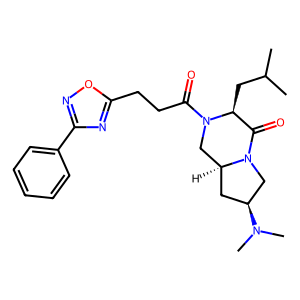

In [10]:
mol = Chem.MolFromSmiles(df['smiles'][50])
Draw.MolToImage(mol)

In [11]:
df['sol_category'].value_counts()

2    65835
1     2835
0     2041
Name: sol_category, dtype: int64

In [12]:
if test_run:
    df, _, __, ___ = train_test_split(df, df['sol_category'], train_size=500, stratify=df['sol_category'])

In [13]:
df['sol_category'].value_counts(normalize=True)

2    0.932
1    0.040
0    0.028
Name: sol_category, dtype: float64

In [14]:
#y = pd.read_excel(xl, 'y', header = None)

In [15]:
# hypothesis fuction
# takes input variables and theta, return calculated output variable

In [16]:
print(len(df))
#print(len(y))
X = df.copy(deep=True)
X.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X

500


,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiocyan,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
62114,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55650,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21443,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28903,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50882,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28577,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52985,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69780,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61202,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Only exfp

In [17]:
X_ecfp = df.copy(deep=True)
drop_list_desc = [column for column in X_ecfp.columns if (column.startswith('example_') or column.startswith('rdkit_desc_'))]

# Drop features 
X_ecfp.drop(drop_list_desc, axis=1, inplace=True)
X_ecfp.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_ecfp

,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,ecfp_4086,ecfp_4087,ecfp_4088,ecfp_4089,ecfp_4090,ecfp_4091,ecfp_4092,ecfp_4093,ecfp_4094,ecfp_4095
62114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21443,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Only descriptors

In [18]:
X_desc = df.copy(deep=True)
drop_list_MFP = [column for column in X_desc.columns if column.startswith('ecfp_')]

# Drop features 
X_desc.drop(drop_list_MFP, axis=1, inplace=True)
X_desc.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_desc

,example_SlogP,example_SMR,example_LabuteASA,example_TPSA,example_AMW,example_ExactMW,example_NumLipinskiHBA,example_NumLipinskiHBD,example_NumRotatableBonds,example_NumHBD,...,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiocyan,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
62114,3.38940,102.1320,157.888937,49.85,370.424,370.169271,5,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55650,-0.73790,49.6559,77.595890,77.12,203.267,203.072848,5,3,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21443,3.71620,110.9295,166.142324,71.41,401.532,401.177313,6,1,5,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28903,1.86640,95.9378,154.403224,70.83,362.474,362.231791,7,1,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50882,3.26510,87.8875,133.205859,38.13,311.410,311.109233,4,0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28577,1.42350,74.0645,117.010649,80.04,274.324,274.142976,6,2,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52985,2.05700,83.5737,134.189045,80.49,316.361,316.153541,7,1,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69780,2.94240,81.2527,141.501774,49.41,360.763,360.085240,4,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61202,3.41602,106.4187,168.465787,93.38,393.447,393.180090,8,1,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### only example descriptors

In [19]:
X_example = X_desc.copy(deep=True)
drop_list_ex = [column for column in X_example.columns if column.startswith('rdkit_desc_')]

# Drop features 
X_example.drop(drop_list_ex, axis=1, inplace=True)
#X_example.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_example

,example_SlogP,example_SMR,example_LabuteASA,example_TPSA,example_AMW,example_ExactMW,example_NumLipinskiHBA,example_NumLipinskiHBD,example_NumRotatableBonds,example_NumHBD,...,example_VABC Volume Descriptor,example_Largest Chain,example_Largest Pi Chain,example_Petitjean Number,example_Lipinski's Rule of Five,example_Topological Polar Surface Area,example_Vertex adjacency information magnitude,example_XLogP,example_Zagreb Index,example_Rotatable Bonds Count (non terminal)
62114,3.38940,102.1320,157.888937,49.85,370.424,370.169271,5,0,5,0,...,346.242849,3.0,10.0,0.466667,0.0,49.85,5.857981,3.876,138.0,5.0
55650,-0.73790,49.6559,77.595890,77.12,203.267,203.072848,5,3,4,2,...,170.178733,6.0,9.0,0.500000,0.0,85.50,4.700440,-0.849,62.0,4.0
21443,3.71620,110.9295,166.142324,71.41,401.532,401.177313,6,1,5,1,...,362.597534,3.0,13.0,0.461538,0.0,79.79,5.954196,3.847,152.0,5.0
28903,1.86640,95.9378,154.403224,70.83,362.474,362.231791,7,1,5,1,...,339.302677,4.0,5.0,0.466667,0.0,70.83,5.857981,1.085,138.0,5.0
50882,3.26510,87.8875,133.205859,38.13,311.410,311.109233,4,0,5,0,...,272.016683,4.0,9.0,0.500000,0.0,66.37,5.584963,2.625,112.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28577,1.42350,74.0645,117.010649,80.04,274.324,274.142976,6,2,5,2,...,249.936068,5.0,7.0,0.454545,0.0,80.04,5.392317,1.220,98.0,5.0
52985,2.05700,83.5737,134.189045,80.49,316.361,316.153541,7,1,5,1,...,280.961805,5.0,11.0,0.500000,0.0,80.49,5.643856,2.435,116.0,5.0
69780,2.94240,81.2527,141.501774,49.41,360.763,360.085240,4,1,3,1,...,297.128261,3.0,6.0,0.454545,0.0,49.41,5.700440,2.225,134.0,4.0
61202,3.41602,106.4187,168.465787,93.38,393.447,393.180090,8,1,6,1,...,347.272654,3.0,16.0,0.473684,0.0,93.38,6.000000,3.165,150.0,6.0


#### only rdkit descriptors

In [20]:
X_rdd = X_desc.copy(deep=True)
drop_list_rd = [column for column in X_rdd.columns if column.startswith('example_')]

# Drop features 
X_rdd.drop(drop_list_rd, axis=1, inplace=True)
#X_example.drop(columns=['Id', 'smiles', 'sol_category'], inplace=True)
X_rdd

,rdkit_desc_MaxEStateIndex,rdkit_desc_MinEStateIndex,rdkit_desc_MaxAbsEStateIndex,rdkit_desc_MinAbsEStateIndex,rdkit_desc_qed,rdkit_desc_MolWt,rdkit_desc_HeavyAtomMolWt,rdkit_desc_ExactMolWt,rdkit_desc_NumValenceElectrons,rdkit_desc_NumRadicalElectrons,...,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiocyan,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
62114,14.362374,-0.412807,14.362374,0.077686,0.757327,370.424,347.240,370.169271,142.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55650,11.424398,-3.352431,11.424398,0.261139,0.676468,203.267,190.163,203.072848,74.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21443,12.794563,-3.185231,12.794563,0.002644,0.830039,401.532,374.316,401.177313,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28903,12.672343,-0.455020,12.672343,0.175847,0.865797,362.474,332.234,362.231791,144.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50882,12.535728,0.040445,12.535728,0.040445,0.725145,311.410,294.274,311.109233,112.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28577,11.978807,-0.206241,11.978807,0.116895,0.863887,274.324,256.180,274.142976,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52985,12.050301,-0.180592,12.050301,0.125405,0.912952,316.361,296.201,316.153541,122.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69780,12.929027,-4.472211,12.929027,0.113798,0.900648,360.763,344.635,360.085240,130.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61202,12.582253,-0.017670,12.582253,0.017670,0.685723,393.447,370.263,393.180090,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y = df.iloc[:, 2]

In [22]:
y

62114    2
55650    2
21443    2
28903    2
50882    2
        ..
28577    2
52985    2
69780    2
61202    2
35403    2
Name: sol_category, Length: 500, dtype: int8

In [23]:
y.unique()

array([2, 1, 0], dtype=int8)

## StandardScaler

In [24]:
#scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
#X = scaler.fit_transform(X)

## split

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1,  shuffle=True, stratify=y)

In [26]:
# find out where NaN is, remove in processing

## multi-class logistic regression

In [27]:
#clf = LogisticRegression(random_state=0, max_iter=1000, verbose=1).fit(X_train, y_train)

In [28]:
#clf.predict(X[:2, :])

In [29]:
#clf.predict_proba(X[:2, :])

In [30]:
#y_prediction = clf.predict(X_test)

In [31]:
#df_y = pd.DataFrame(y_prediction)

In [32]:
# Stricter feature selection
### 1. just use ecfp/rdkit+example
### 2. Hyperparatuning (StratifiedKfold+RandomizedSearchCV on X_train and y_train) (max_iter, solver, penalty,C)

# for dataset over all_dataset
#   hyperparameter tuning()

In [33]:
from sklearn.utils import class_weight
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import cohen_kappa_score
from numpy import linspace

In [34]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [35]:
all_dataset = list()
all_dataset.append(X)
#all_dataset.append(X_ecfp)
#all_dataset.append(X_desc)
#all_dataset.append(X_example)
#all_dataset.append(X_rdd)

In [36]:

# setup parameters for xgboost
params = {}
#params['booster'] = 'gbtree' #['gbtree', 'gblinear', 'dart']
#params['objective'] = ['binary:logistic']
#params["eval_metric"] = ["error"]
params['eta'] = 0.001 #, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] # boosting learning rate
params['gamma'] = 0.5 #linspace(0.000000001, 1.0, num=11) # min loss red recuired for further partition on leaf node
params['max_depth'] = 7 #np.arange(1, 11, 2) # max tree dept for base learners
params['n_estimators'] = 100 #np.arange(50, 550, 50) maybe 250 ??
params['min_child_weight'] = 1 # min sum of instance weight in a child
params['max_delta_step'] = 0 # max delta step allowed for each tree's weight estimate
params['subsample']= 0.5 #[0.5, 1] # subsample ratio of training instance
params['colsample_bytree'] = 1 # subsample ratio of columns when cunstructing each tree
#params['silent'] = [1]
#params['seed'] = [0] # = random_state ???
params['base_score'] = 0.5 # initial prediction score, global bias
#params['random_state'] = [0] # = seed ???
#params['scale_pos_weight'] = ratio
params['n_jobs'] = 5




In [37]:
i = 1

for dataset in all_dataset:

    # apply StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(dataset)
    dataset = scaler.fit_transform(dataset)

    # split data set
    StratifiedKFold(n_splits=5)
    X_train, X_val, y_train, y_val = train_test_split(dataset, y, random_state=1,  shuffle=True, stratify=y)#, test_size=0.2, train_size=0.8)

    # define class weights
    classes_weights = class_weight.compute_sample_weight(
        class_weight='balanced',
        y=y_train
        )

    model = XGBClassifier(**params)

    model.fit(X_train, y_train, sample_weight=classes_weights)


    valPredictions = model.predict(X_val)

    #quad kappa score
    sk_quad_kappa = cohen_kappa_score(y_val, valPredictions, weights='quadratic')
    
    #define data set name
    if i == 1:
        dataset_name = 'X'
    #elif i == 2:
        #dataset_name = 'X_ecfp'
    #elif i == 3:
        #dataset_name = 'X_desc'
    #i +=1
    
    # printing results
    print(f'quadratic kappa score of data set {dataset_name}: {sk_quad_kappa}')



quadratic kappa score of data set X: 0.0


In [38]:

real_test_set = pd.read_csv('Temp/df_test_set.csv')
sub_template = pd.read_csv('Data/submission_template_rdm.csv')
(sub_template['Id'] == real_test_set['Id']).value_counts()


True    30307
Name: Id, dtype: int64

In [39]:

real_test_set.drop(columns=['Id', 'smiles'], inplace=True)

# apply StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(real_test_set)
real_test_set = scaler.fit_transform(real_test_set)

# prediction
realtestPredictions = model.predict(real_test_set)
sub_template['pred'] = realtestPredictions


In [40]:
set(realtestPredictions)

{1, 2}

In [41]:

sub_template['pred'].value_counts()


2    30306
1        1
Name: pred, dtype: int64

In [42]:
#sub_template

## save as csv

In [44]:
sub_template.to_csv('Submissions/submission_28_11_C-men.csv', index=False)